In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from plot_functions import *
from importlib import reload  
import sys
sys.path.append("/home/mlparker/programs/python_modules/plotting_functions/")
from step_plots import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [3]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

def itomu(i):
    mu=np.cos(i/320*2*np.pi)

In [47]:
datafile="simulated_spectra_2/athena_hybrid/fits_dw_3to10.dat"
data=pd.read_csv(datafile)

data["i"]=mutoi(data["mu"])
data["fit_i"]=mutoi(data["fit_mu"])
data["delta_mdot"]=data["fit_mdot"]-data["mdot"]
data["delta_fv"]=data["fit_fv"]-data["fv"]
data["delta_lx"]=data["fit_lx"]-data["lx"]
data['redchi']=data['chi2']/data['dof']
# print(data[['chi2','dof']])

# print(data.columns)
print(data.shape[0])

clean_data=data[data['redchi']<1.25]
dirty_data=data[data['redchi']>1.25]
print(clean_data.shape[0],dirty_data.shape[0])

1000
965 35


0.6756576400682134
183 / 965


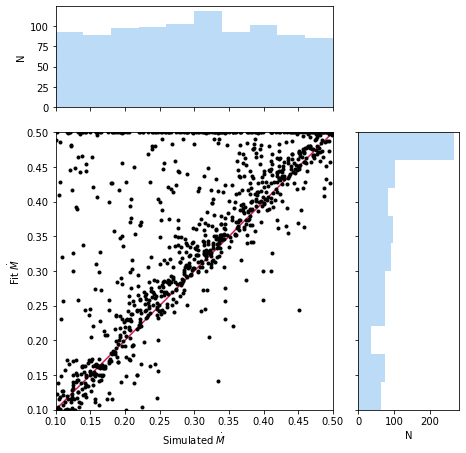

In [37]:
mdot_plot(clean_data)
print(clean_data.corr()['mdot']['fit_mdot'])
maxmdot=clean_data[clean_data['fit_mdot']>0.49]
print(maxmdot.shape[0],'/',clean_data.shape[0])
pl.savefig('figures/param_recovery/athenahybrid_dw_mdot.pdf',bbox_inches='tight')

0.9500723254761002


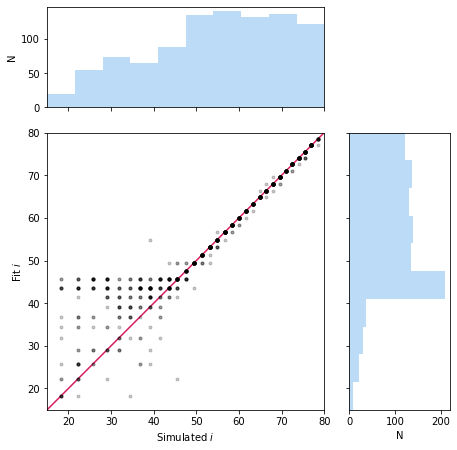

In [38]:
inc_plot(clean_data,alpha=0.2)
print(clean_data.corr()['i']['fit_i'])
pl.savefig('figures/param_recovery/athenahybrid_dw_i.pdf',bbox_inches='tight')

0.7435022868101961


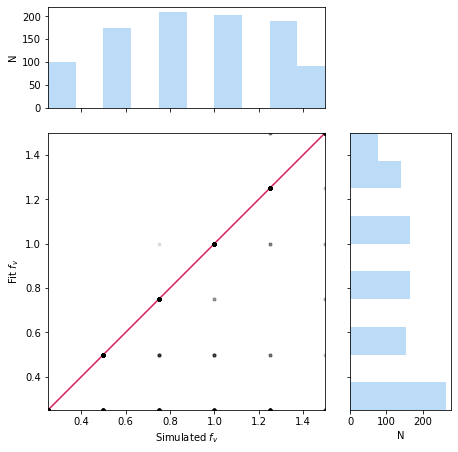

In [39]:
fv_plot(clean_data)
print(clean_data.corr()['fv']['fit_fv'])
pl.savefig('figures/param_recovery/athenahybrid_dw_fv.pdf',bbox_inches='tight')

0.6028734508945734


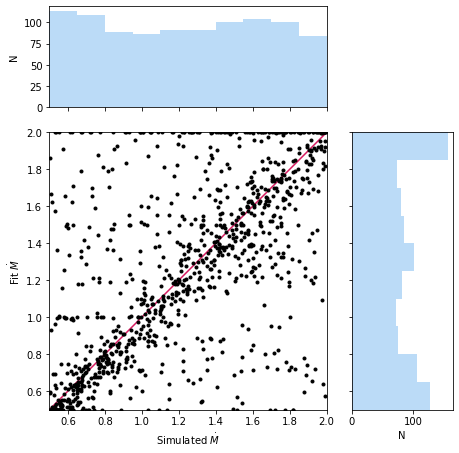

In [40]:
lx_plot(clean_data)
print(clean_data.corr()['lx']['fit_lx'])
pl.savefig('figures/param_recovery/athenahybrid_dw_lx.pdf',bbox_inches='tight')

In [41]:
clean_sample=clean_data.sample(8)

In [42]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,i in enumerate(clean_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.8,5)
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,3,4]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s_dw.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*fscale*spectrum['x']**escale,\
                spectrum['yerr']*fscale*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1.,alpha=0.3)
    
    step_plot(spectrum['x'],\
              spectrum['model']*fscale*spectrum['x']**escale,\
              spectrum['xerr'],\
              color=C1,lw=1)
    
    
# pl.savefig('figures/spectra/dw_clean_spectra.pdf',bbox_inches='tight')
pl.savefig('figures/spectra/dw_clean_spectra_athena.pdf',bbox_inches='tight')

SyntaxError: invalid syntax (<ipython-input-42-26c199189b87>, line 31)

In [44]:
dirty_sample=dirty_data.sample(8)

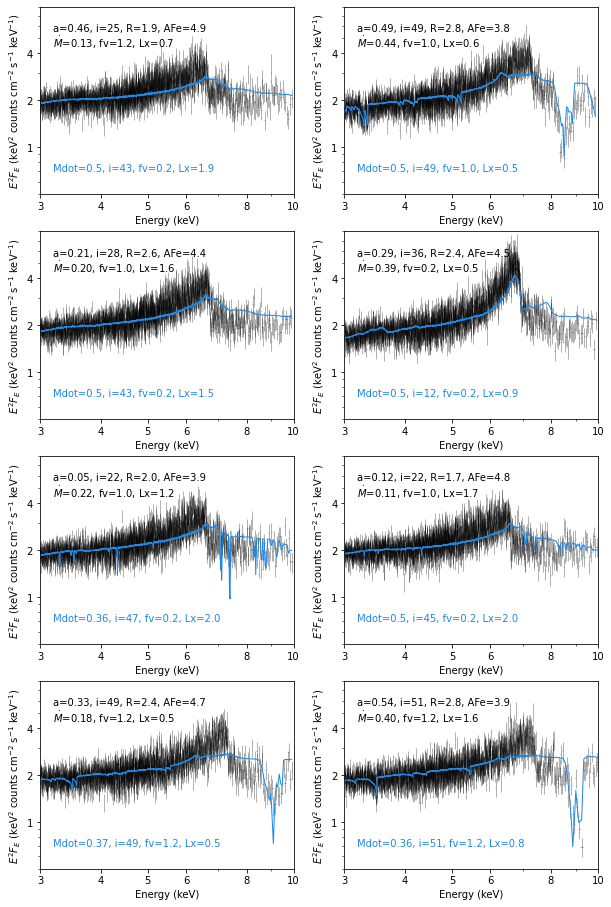

In [45]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,fname in enumerate(dirty_sample["filename"]):
# for j,i in enumerate(dirty_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.5,8)
    
    i=fname.split('_')[1]
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,4]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/athena_hybrid/spectrum_%s_dw.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*fscale*spectrum['x']**escale,\
                spectrum['yerr']*fscale*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1,alpha=0.3)
    
    pl.plot(spectrum['x'],\
              spectrum['model']*fscale*spectrum['x']**escale,\
              # spectrum['xerr'],\
              color=C2,lw=1)
    
    
    mdot=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_mdot'])))
    fv=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_fv'])))
    Lx=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_lx'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_i'])))
    dw_pars='Mdot=%s, i=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(inc)[:2],str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.12,dw_pars,transform=ax.transAxes,color=C2)
    
    a=(float((dirty_sample.loc[dirty_sample['filename']==fname]['a'])))
    R=(float((dirty_sample.loc[dirty_sample['filename']==fname]['R'])))
    AFe=(float((dirty_sample.loc[dirty_sample['filename']==fname]['Afe'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['i'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.87,ref_pars,transform=ax.transAxes,color='k')
    
    
    mdot=(float((dirty_sample.loc[dirty_sample['filename']==fname]['mdot'])))
    fv=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fv'])))
    Lx=(float((dirty_sample.loc[dirty_sample['filename']==fname]['lx'])))
    dw_pars=r'$\dot{M}$=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.78,dw_pars,transform=ax.transAxes,color='k')
    
pl.savefig('figures/spectra/dw_dirty_spectra_athena.pdf',bbox_inches='tight')

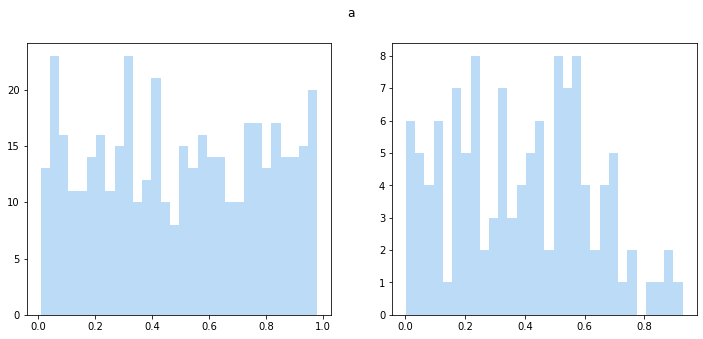

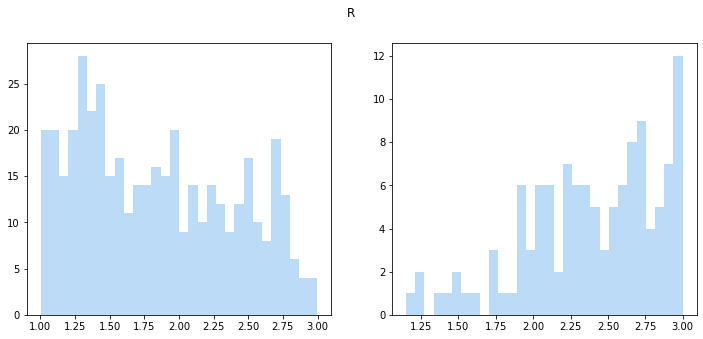

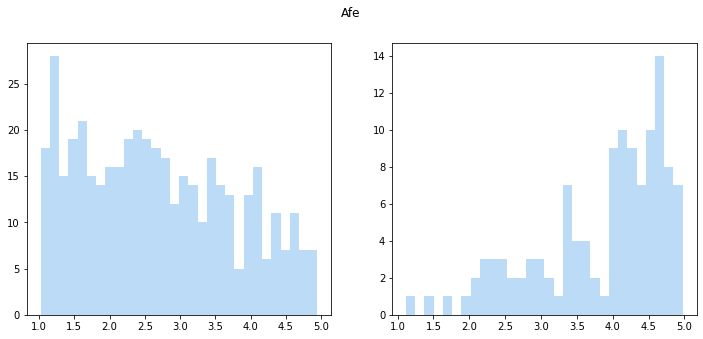

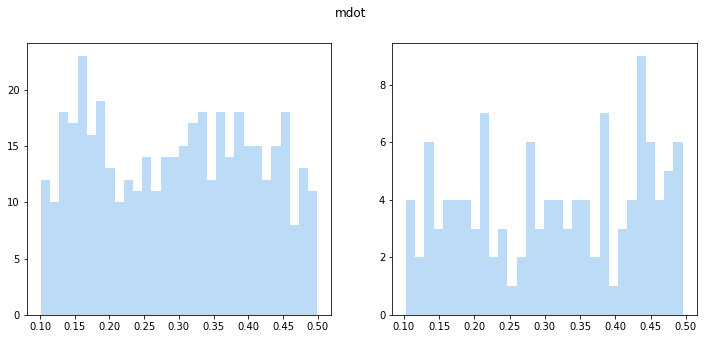

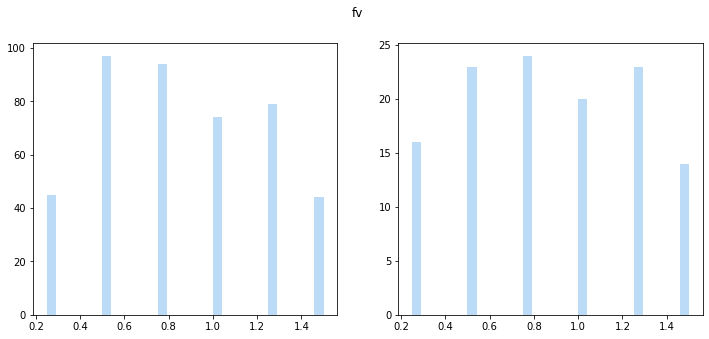

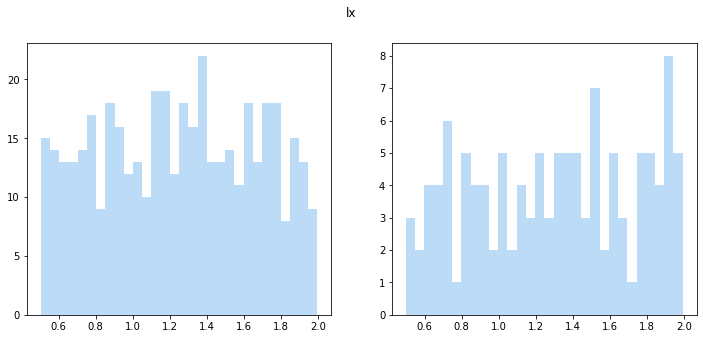

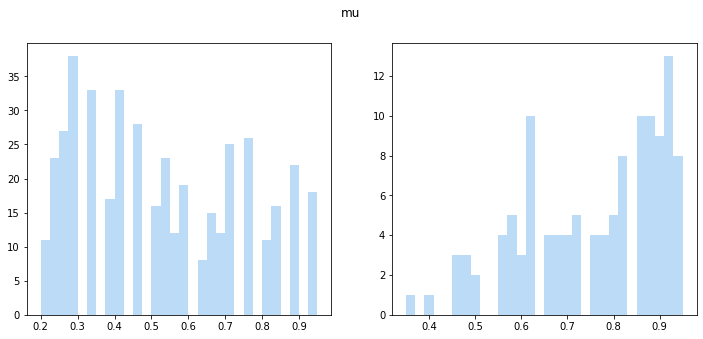

In [98]:
for c in ['a','R','Afe','mdot','fv','lx','mu']:
    fig=pl.figure(figsize=(12,5),facecolor='w')
    fig.suptitle(c)
    ax1=pl.subplot(121)
    h1=pl.hist(clean_data[c],bins=30,color=C2,alpha=0.3)
    ax2=pl.subplot(122)
    h2=pl.hist(dirty_data[c],bins=30,color=C2,alpha=0.3)